In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from torch.distributions.normal import Normal
from torch.distributions.log_normal import LogNormal
from torch.distributions.transformed_distribution import TransformedDistribution
from torch.distributions.transforms import SigmoidTransform, AffineTransform, ExpTransform
from torch.distributions import constraints
from torch.distributions.utils import broadcast_all

In [3]:
class Radius(TransformedDistribution):
    r"""
    Creates a distribution for hyperbolic radius parameterized by `loc`,`scale` and `R` where::

        X ~ Normal(loc, scale)
        Y = R * Sigmoid(X) ~ Radius(loc, scale, R)

    Example::

        >>> m = Radius(0., 1., 10.)
        >>> m.rsample()
        tensor(5.4377)

    Args:
        loc (float or Tensor): mean of the base Normal distribution
        scale (float or Tensor): scale of the base Normal distribution
        R (float or Tensor): maximal hyperbolic radius
    """
    arg_constraints = {'loc': constraints.real,
                       'scale': constraints.positive,
                       'R': constraints.positive}
    support = constraints.positive
    has_rsample = True

    def __init__(self, loc, scale, R, validate_args=None):
        self.loc, self.scale, self.R = broadcast_all(loc, scale, R)
        base_dist = Normal(loc, scale)
        transforms = [SigmoidTransform(), AffineTransform(loc=0, scale=R)]
        super(Radius, self).__init__(base_dist, transforms, validate_args=validate_args)
        
    @property
    def mean(self):
        return torch.sigmoid(self.loc)*self.R

In [53]:
r_ = Radius(20., 4., 5.)
r_.rsample([10])

tensor([5.0000, 5.0000, 5.0000, 5.0000, 5.0000, 5.0000, 5.0000, 5.0000, 5.0000,
        5.0000])

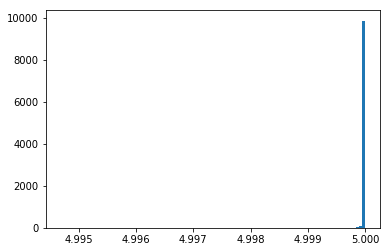

In [54]:
plt.hist(r_.rsample([10000]), bins=100)
plt.show()

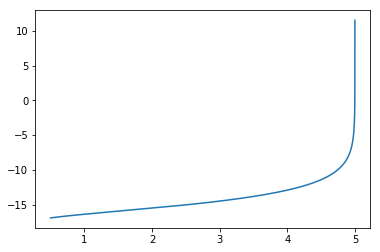

In [55]:
x = torch.arange(0.5, 5.001, 0.001)
plt.plot(x, r_.log_prob(x))

In [56]:
r_.log_prob(torch.tensor(5.))

tensor(11.5132)

(array([8.602e+03, 0.000e+00, 0.000e+00, 2.670e+02, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.690e+02, 0.000e+00, 0.000e+00, 9.400e+01,
        0.000e+00, 8.900e+01, 0.000e+00, 5.600e+01, 5.000e+01, 3.400e+01,
        8.100e+01, 0.000e+00, 5.300e+01, 1.300e+01, 3.600e+01, 1.200e+01,
        3.200e+01, 2.300e+01, 1.400e+01, 1.900e+01, 2.600e+01, 1.500e+01,
        1.900e+01, 2.300e+01, 2.100e+01, 2.900e+01, 1.200e+01, 1.300e+01,
        8.000e+00, 1.000e+01, 1.100e+01, 1.000e+01, 1.200e+01, 1.900e+01,
        5.000e+00, 1.300e+01, 9.000e+00, 1.000e+01, 5.000e+00, 5.000e+00,
        6.000e+00, 7.000e+00, 4.000e+00, 4.000e+00, 6.000e+00, 3.000e+00,
        3.000e+00, 0.000e+00, 5.000e+00, 6.000e+00, 4.000e+00, 2.000e+00,
        2.000e+00, 1.000e+00, 2.000e+00, 2.000e+00, 3.000e+00, 3.000e+00,
        0.000e+00, 2.000e+00, 1.000e+00, 3.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 2.000e+00, 1.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

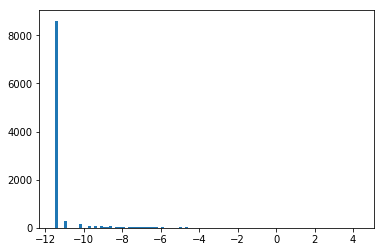

In [59]:
plt.hist(-r_.log_prob(r_.rsample([10000])), bins=100)

In [52]:
np.log(5)

1.6094379124341003

In [50]:
R = 10
base_distribution = Normal(5., 1.)
transforms = [SigmoidTransform(), AffineTransform(loc=0, scale=R)]
r = TransformedDistribution(base_distribution, transforms)

In [24]:
torch.sigmoid(torch.tensor([0.]))*R

tensor([5.])

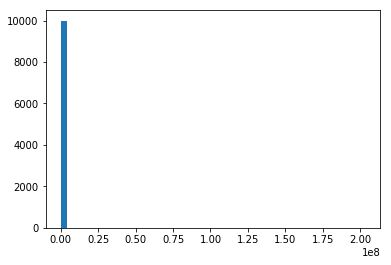

In [28]:
#R_x = torch.randn(2).exp()
R_x = torch.tensor([-0.1,1.5]).exp()
R_samples = LogNormal(R_x[0], R_x[1]).rsample([10000])
plt.hist(R_samples, bins=50)
plt.show()

In [13]:
base_distribution = Normal(0, 1)
transforms = [ExpTransform()]
r = TransformedDistribution(base_distribution, transforms)
pd = LogNormal(0, 1)

In [19]:
print(r.log_prob(torch.tensor([0.1, 0.2, 2.5])))
print(pd.log_prob(torch.tensor([0.1, 0.2, 2.5])))

tensor([-1.2673, -0.6046, -2.2550])
tensor([-1.2673, -0.6046, -2.2550])


In [8]:
r.log_prob(torch.tensor([0.1]))

tensor([-1561.5719])

In [44]:
torch.tensor([-2.3, 1.6]).exp()

tensor([0.1003, 4.9530])

In [45]:
torch.tensor([1,.2]).log()

tensor([ 0.0000, -1.6094])

In [31]:
t.fmod(1.)

tensor([-0.5000,  0.4000,  0.4000,  0.6000,  0.0000,  0.0000])

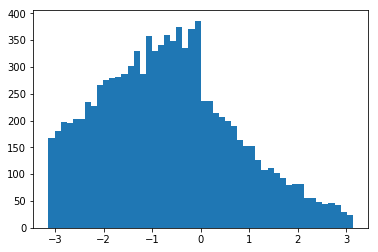

In [43]:
sam = Normal(2., 2.).rsample([10000]).add(-np.pi).fmod(np.pi)
plt.hist(sam, bins=50)
plt.show()

In [45]:
-5%2

1

In [2]:
loop_count = 0
while True:
    loop_count += 1
    if loop_count > 10000:
        raise Exception('Infinite loop!!!')

Exception: Infinite loop!!!

In [19]:
bool((torch.tensor([1.,0,1])==2).sum())

False

In [20]:
np.log(0.5)

-0.6931471805599453

In [21]:
import warnings
warnings.warn('!!!!')

/home/mozzhorin/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: UserWarning: !!!!
  


In [24]:
from torch.distributions.kl import kl_divergence
R_q = torch.tensor([0.5,-1.3]).exp()
R_p = torch.tensor([0.,1.])
kl_divergence(LogNormal(R_q[0], R_q[1]), LogNormal(R_p[0], R_p[1]))

tensor(2.1963)

In [25]:
kl_divergence(LogNormal(R_p[0], R_p[1]), LogNormal(R_q[0], R_q[1]))

tensor(23.2310)

In [35]:
LogNormal(torch.tensor(1.5), torch.tensor(1.5)).rsample([20]).squeeze(-1)

tensor([ 0.2564,  8.7319, 17.9631,  2.1669,  3.1261,  5.3927, 33.5302, 48.5730,
         7.7925,  5.2530,  2.0912,  0.6523, 39.8587,  2.8725, 32.9628,  0.3996,
         7.1935,  5.2235,  4.4294,  2.5513])